<a href="https://colab.research.google.com/github/JulianeAndrade/JA-SD/blob/master/Aplicacao_Python_Ciencia_Dados_JulianeValente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação Prática de Python na Ciência de Dados

**Aluno:** Juliane Valente  
**Objetivo:** Utilizar Python e bibliotecas como Pandas para explorar um dataset de inadimplência de cartões de crédito.  
**Comentário:** Estou achando a atividade muito interessante! O Colab é bem fácil de usar e ajuda bastante a visualizar os resultados passo a passo.


In [11]:
# @title
import pandas as pd

# Make sure the file path is correct or provide the full path.
# For example, if the file is in a folder named "data" within the current directory:
file_path = "default_of_credit_card_clients__courseware_version_1_21_19.xls"  # Update to the actual path or filename

# Lê o arquivo Excel
df = pd.read_excel(file_path)

# Visualiza as primeiras linhas
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
# @title
# Número de colunas e linhas
print("Número de colunas:", df.shape[1])
print("Número de linhas:", df.shape[0])

# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Separando colunas numéricas e categóricas
colunas_numericas = df.select_dtypes(include='number').columns
colunas_categoricas = df.select_dtypes(include='object').columns
print("\nColunas numéricas:", list(colunas_numericas))
print("Colunas categóricas:", list(colunas_categoricas))

# Estatísticas descritivas das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(df.describe())

# Frequência de valores categóricos (se houver)
for col in colunas_categoricas:
    print(f"\nFrequência da coluna '{col}':")
    print(df[col].value_counts())

# Verificando valores faltantes
print("\nDados faltantes por coluna:")
print(df.isnull().sum())


Número de colunas: 25
Número de linhas: 30000

Tipos de dados:
ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: objec

<ipython-input-17-46a1be7e7103>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Evita sobreposição com o título
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


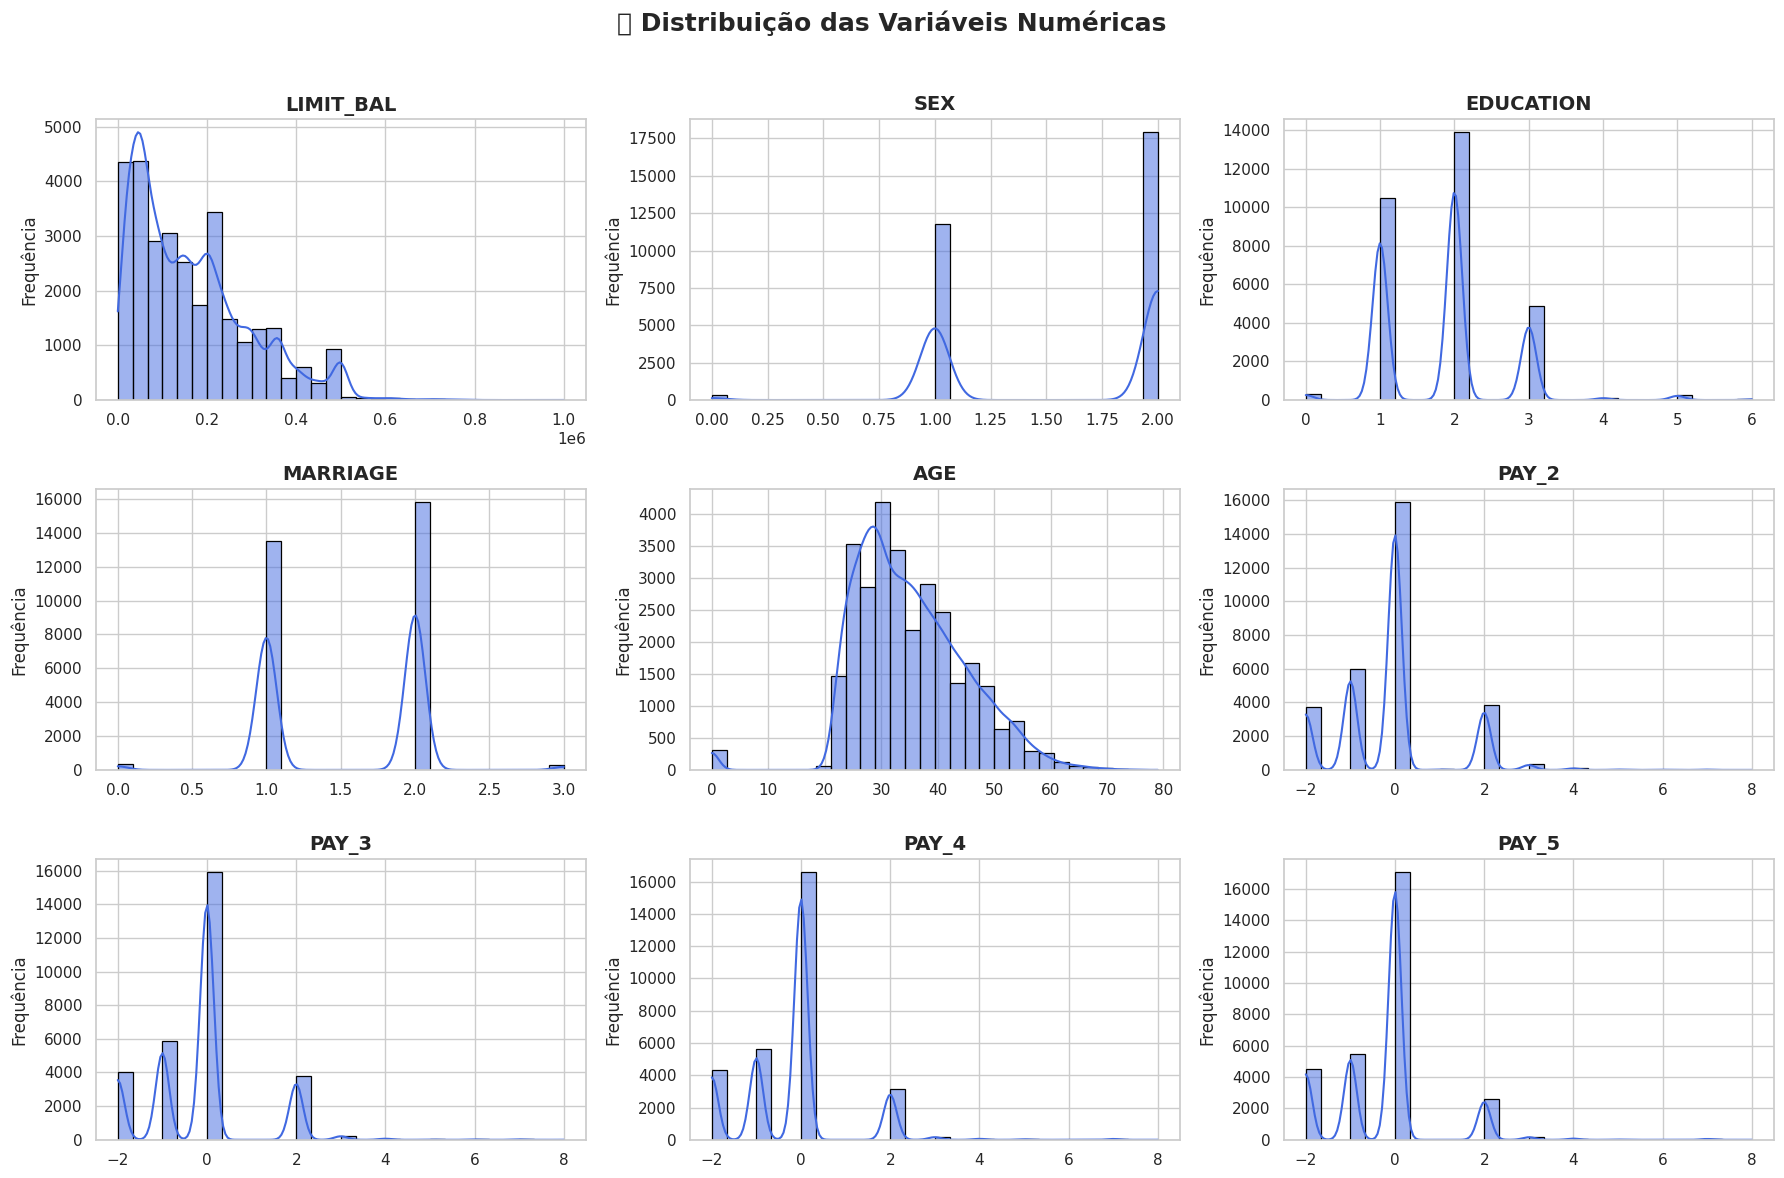

In [17]:
# @title

# Definir estilo do gráfico
sns.set(style="whitegrid")

# Criando uma figura maior e melhor organizada
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  # Define 3 linhas e 3 colunas

# Selecionando apenas variáveis numéricas
colunas_numericas = df.select_dtypes(include=['number']).columns

# Loop para criar um histograma para cada variável numérica
for ax, coluna in zip(axes.flatten(), colunas_numericas[:9]):  # Limita a 9 variáveis
    sns.histplot(df[coluna], bins=30, kde=True, ax=ax, color="royalblue", edgecolor="black")
    ax.set_title(coluna, fontsize=14, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Frequência")

# Ajusta o layout para melhor visualização
plt.suptitle("📊 Distribuição das Variáveis Numéricas", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Evita sobreposição com o título
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


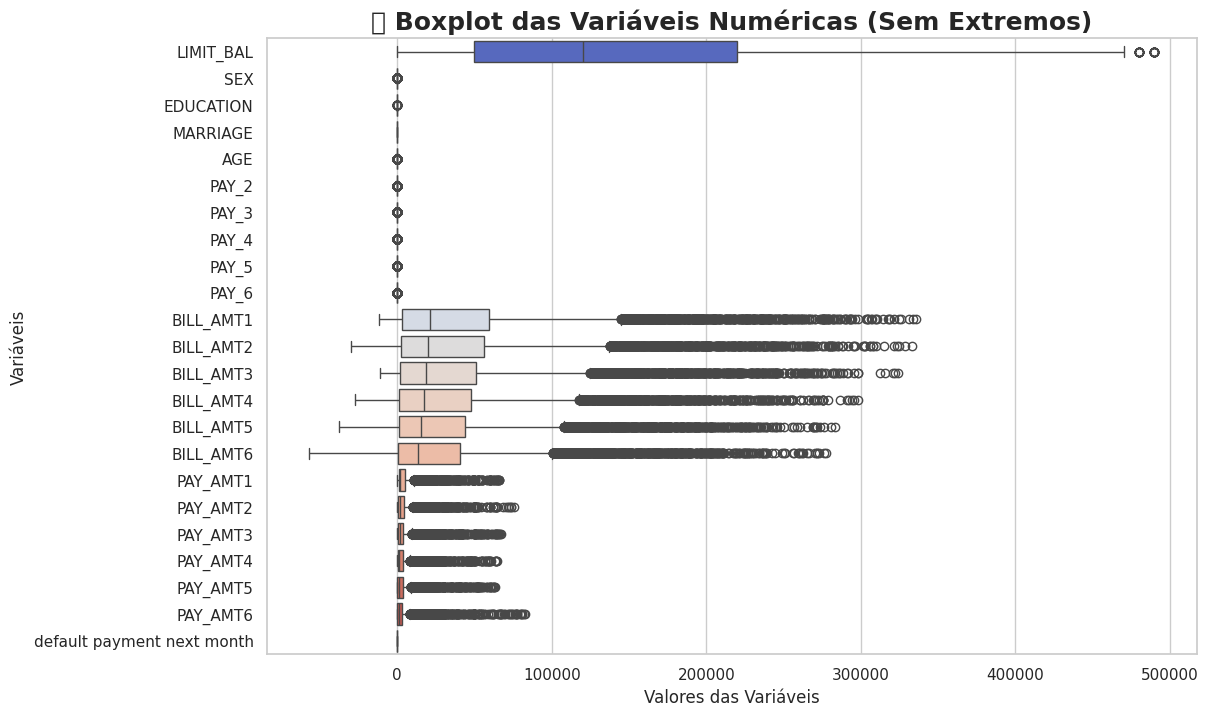

In [19]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecionando apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[np.number])

# Removendo outliers extremos para melhorar a visualização
df_numerico = df_numerico[(df_numerico < df_numerico.quantile(0.99)).all(axis=1)]

# Criando o Boxplot ajustado
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numerico, orient='h', palette="coolwarm")

# Ajustando título e rótulos
plt.title("📊 Boxplot das Variáveis Numéricas (Sem Extremos)", fontsize=18, fontweight="bold")
plt.xlabel("Valores das Variáveis")
plt.ylabel("Variáveis")
plt.show()


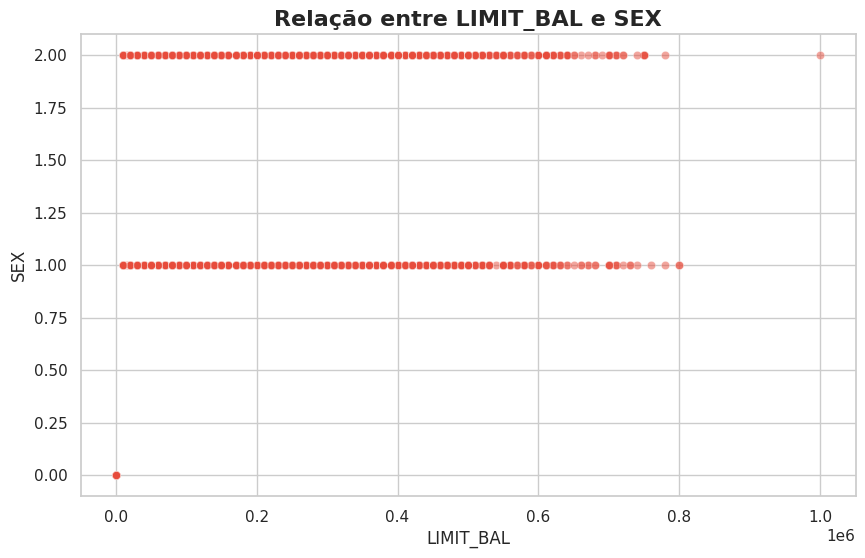

In [15]:
# @title
# 📊 Gráfico de dispersão entre duas variáveis numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 1], y=df.iloc[:, 2], alpha=0.5, color="#e74c3c")
plt.title(f"Relação entre {df.columns[1]} e {df.columns[2]}", fontsize=16, fontweight='bold')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


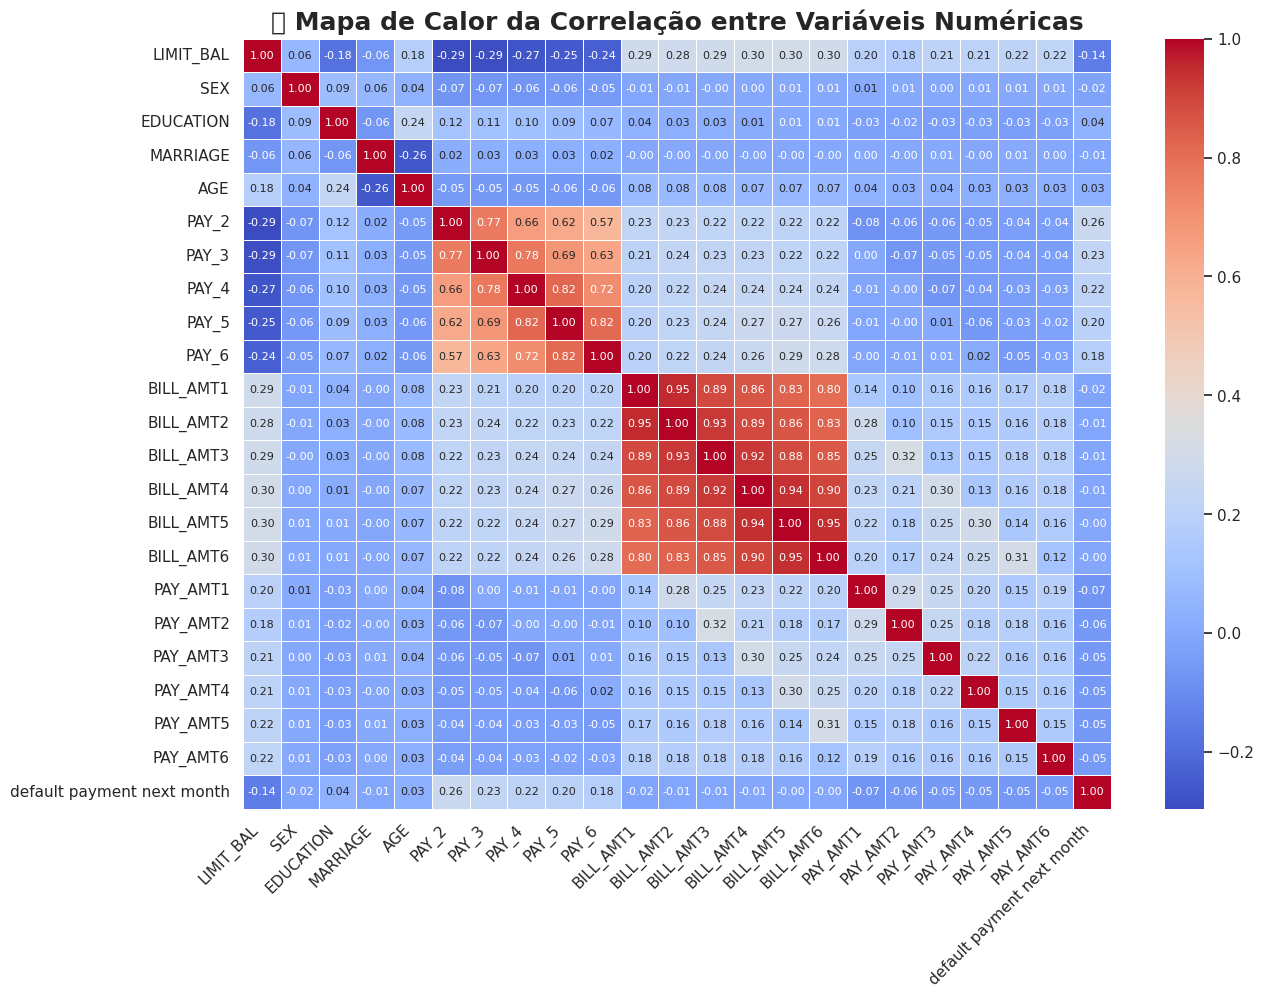

In [18]:
# @title
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas para evitar erro
df_numerico = df.select_dtypes(include=[np.number])

# Criar a figura maior para evitar sobreposição
plt.figure(figsize=(14, 10))

# Criar o heatmap de correlação com melhorias na visualização
sns.heatmap(df_numerico.corr(),
            annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5,
            annot_kws={"size": 8})  # Reduz tamanho dos números dentro das células

# Ajustar rótulos das colunas
plt.xticks(rotation=45, ha='right')  # Rotaciona para melhor leitura
plt.yticks(rotation=0)  # Mantém rótulos verticais para alinhamento

# Adicionar título
plt.title("📊 Mapa de Calor da Correlação entre Variáveis Numéricas", fontsize=18, fontweight='bold')

# Exibir gráfico
plt.show()


In [21]:
!jupyter nbconvert --to markdown --no-input Aplicacao_Python_Ciencia_Dados.ipynb


[NbConvertApp] Converting notebook Aplicacao_Python_Ciencia_Dados.ipynb to markdown
[NbConvertApp] Writing 989 bytes to Aplicacao_Python_Ciencia_Dados.md
